# VGG

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision
from train_func import *

In [ ]:
class VGG(nn.Module):
    def __init__(self,in_channel,vgg_arch):
        super(VGG,self).__init__()
        self.image  = self.vgg_block(in_channel,vgg_arch)
        self.linear = self.linear_(vgg_arch[-1][-1])
    def forward(self,x):
        x=self.image(x)
        x=self.linear(x)
        return x


    def vgg_block(self,in_channel,vgg_arch):
        conv_block=[]
        for nums,out_channel in vgg_arch:
            conv_block.append(self.block_(nums,in_channel,out_channel))
            in_channel=out_channel
        conv_block.append(nn.Flatten())
        return nn.Sequential(*conv_block)
    
    def block_(self,nums,in_channel,out_channel):
        layers=[]
        # add convolution layers (didnt change shape)
        for _ in range(nums):
            layers.append(nn.Conv2d(in_channels=in_channel,out_channels=out_channel,kernel_size=3,padding=1))
            layers.append(nn.ReLU())
            in_channel=out_channel
        # reduce shape by half using maxpool
        layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
        return nn.Sequential(*layers)
    
    def linear_(self,out_channels):
        layer=nn.Sequential(
            nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.7),
            nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.7),
            nn.Linear(4096, 10)
        )
        return layer

            

In [ ]:
# VGG-11
vgg_arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
model=VGG(3,vgg_arch)
model

VGG(
  (image): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2

In [ ]:
train_dl,test_dl = get_CIFAR10(size=224,batch_size=50)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model=VGG(3,vgg_arch).cuda()
optimizer=torch.optim.AdamW(model.parameters(),lr=0.00005,weight_decay=5e-4) 
train_loop(model,optimizer,train_dl,test_dl,4)
optimizer=torch.optim.AdamW(model.parameters(),lr=0.000001,weight_decay=5e-3) 
train_loop(model,optimizer,train_dl,test_dl,20)


train loss:1.817, test loss: 1.427, test acc: 0.487
train loss:1.352, test loss: 1.121, test acc: 0.603
train loss:1.094, test loss: 0.985, test acc: 0.661
train loss:0.895, test loss: 0.852, test acc: 0.708
train loss:0.706, test loss: 0.788, test acc: 0.725
train loss:0.681, test loss: 0.782, test acc: 0.726
train loss:0.669, test loss: 0.776, test acc: 0.729
train loss:0.659, test loss: 0.773, test acc: 0.731
train loss:0.649, test loss: 0.77, test acc: 0.733
train loss:0.639, test loss: 0.768, test acc: 0.736
train loss:0.631, test loss: 0.765, test acc: 0.737
train loss:0.623, test loss: 0.765, test acc: 0.737
train loss:0.613, test loss: 0.763, test acc: 0.738
train loss:0.611, test loss: 0.761, test acc: 0.74
train loss:0.603, test loss: 0.758, test acc: 0.74
train loss:0.599, test loss: 0.756, test acc: 0.74
train loss:0.589, test loss: 0.757, test acc: 0.741
train loss:0.585, test loss: 0.752, test acc: 0.744
train loss:0.575, test loss: 0.755, test acc: 0.741
train loss:0.573

In [ ]:
#VGG-16
# vgg_arch=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
# model=VGG(3,vgg_arch)
# model

In [ ]:
# model=VGG(3,vgg_arch).cuda()
# optimizer=torch.optim.SGD(model.parameters(),lr=0.05,weight_decay=5e-4) 
# train_loop(model,optimizer,train_dl,test_dl,10)

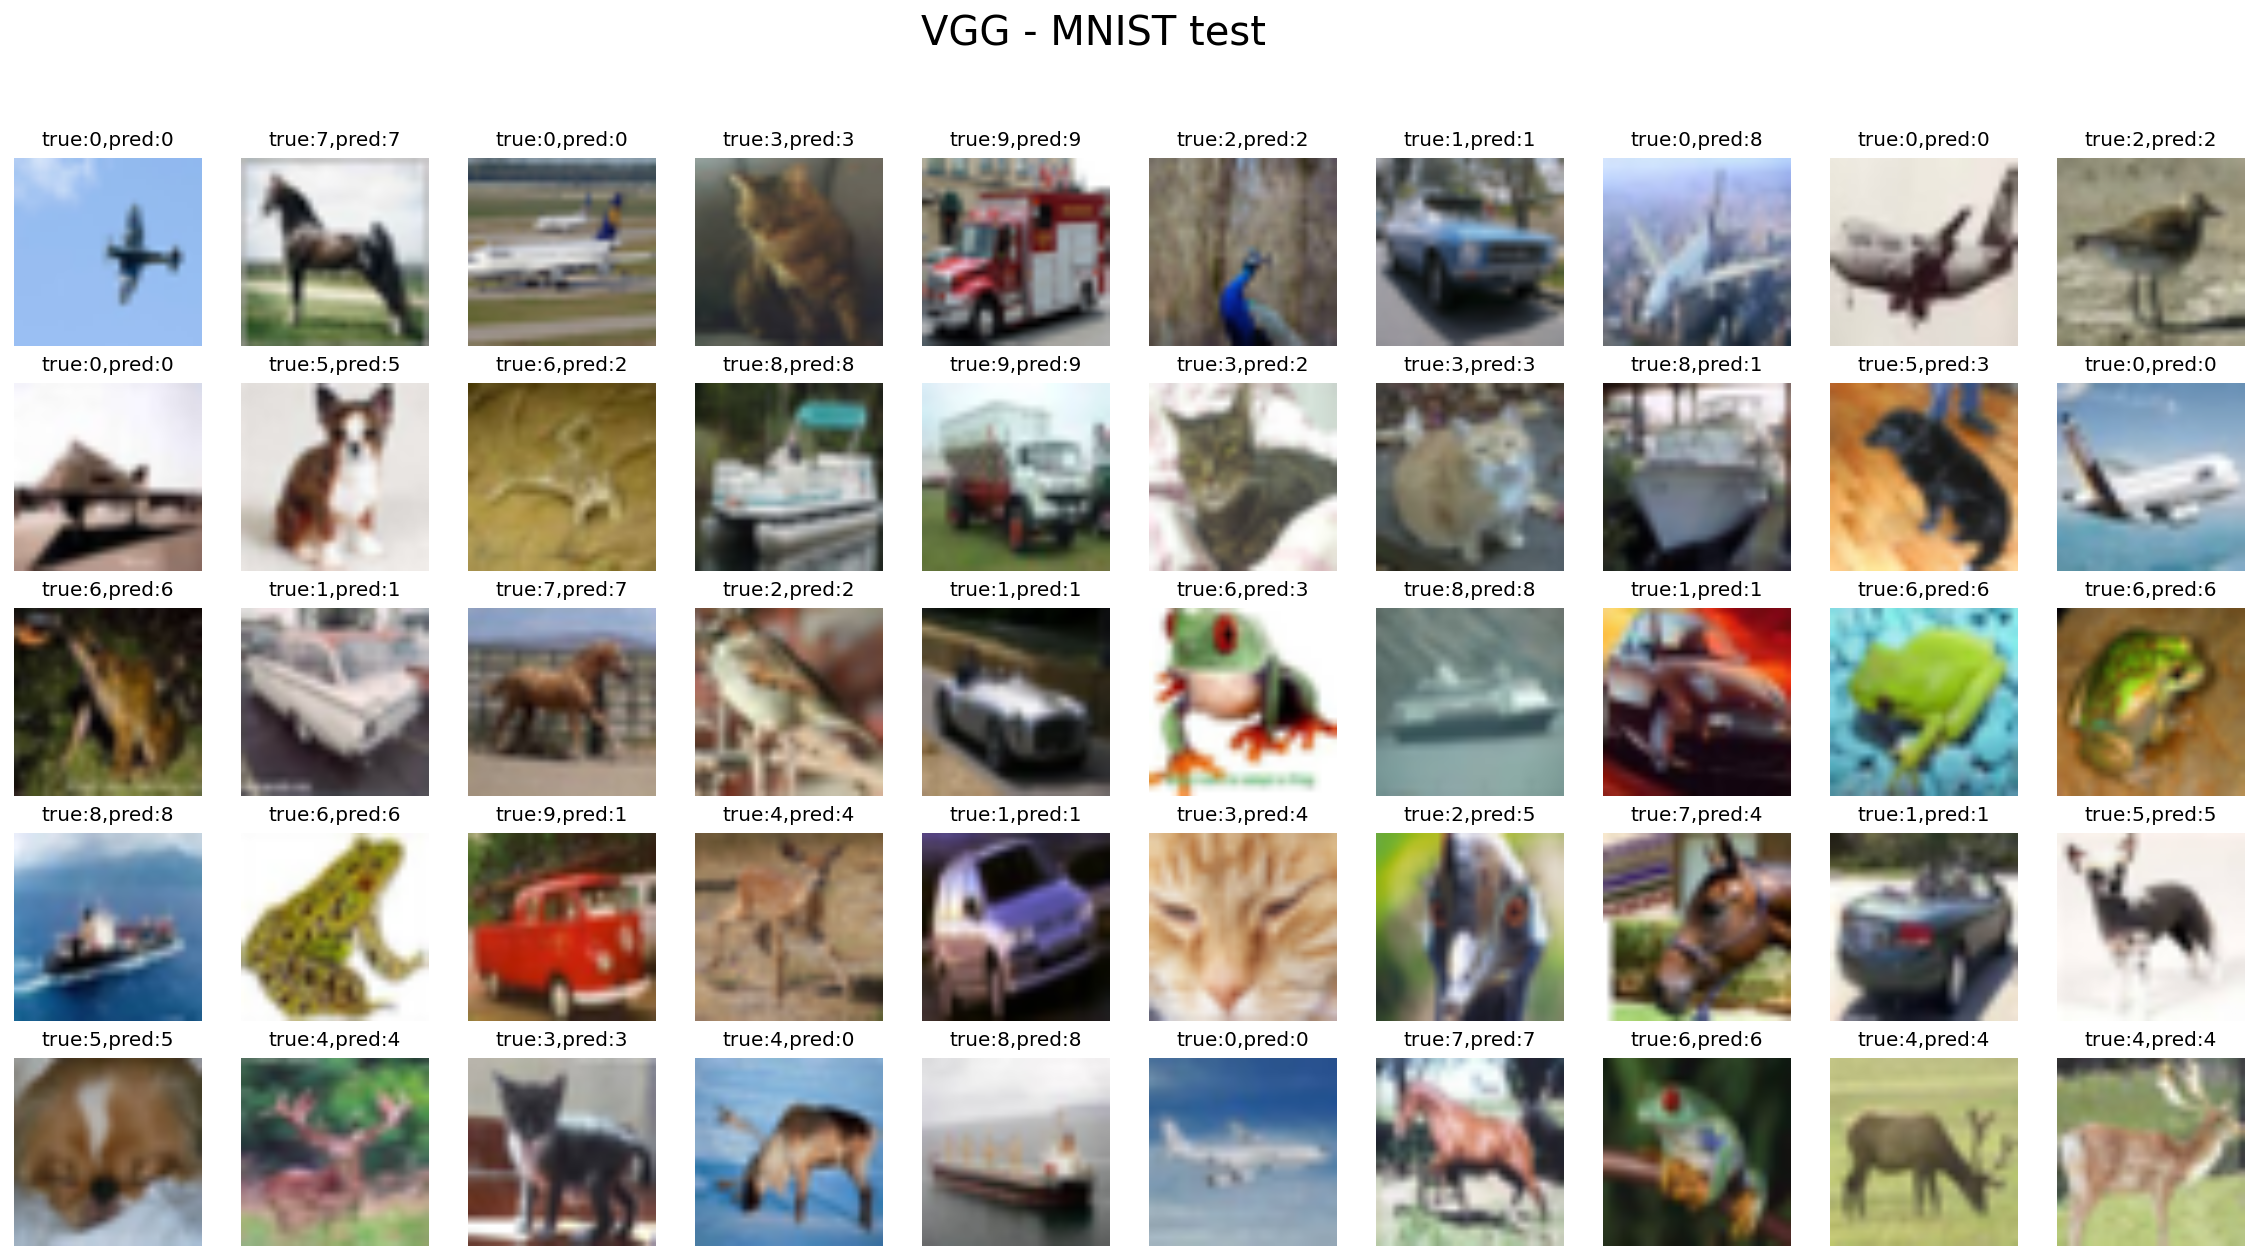

In [ ]:
row = 10
col = 5
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# get valid data set
valid_x,valid_y=next(iter(test_dl))[:50]
fig = plt.figure(figsize=(20,10))
pred_label=model(valid_x.cuda()).argmax(dim=1)
true_label=valid_y
for i in range(1, row * col + 1):
    plt.subplot(col, row, i)
    plt.axis('off')
    plt.imshow(valid_x[i-1].detach().numpy().transpose((1, 2, 0)), cmap='gray_r')
    title = f'true:{true_label[i-1]},pred:{pred_label[i-1]}'
    plt.title(title, fontsize=10)
fig.suptitle('VGG - MNIST test',fontsize=20)
plt.savefig("VGG_MNIST_test",facecolor="w")
plt.show()

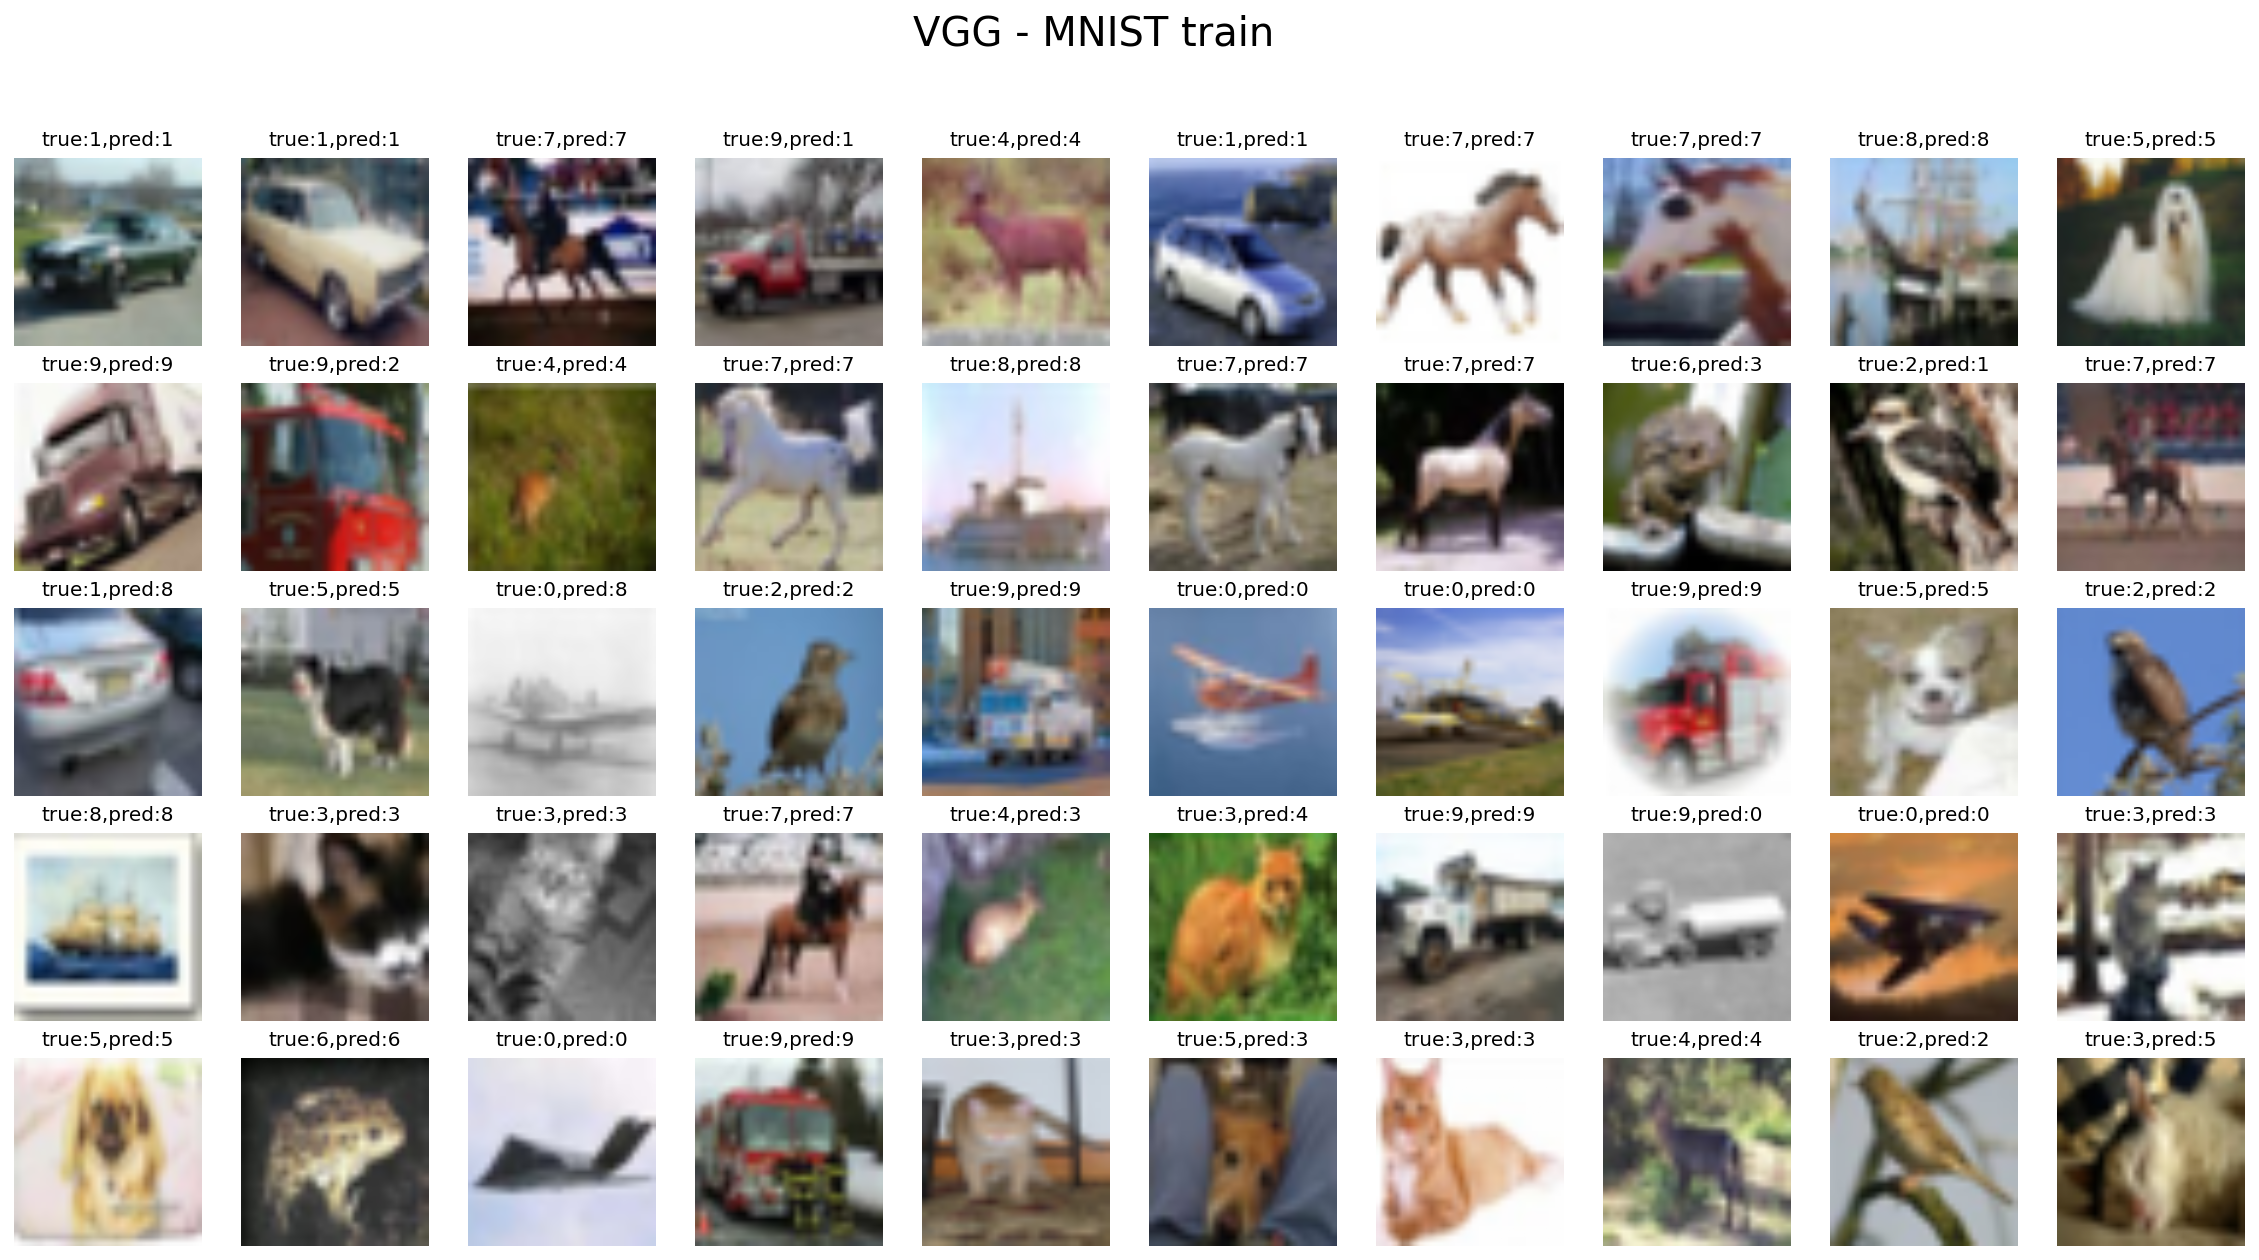

In [ ]:
row = 10
col = 5
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# get valid data set
valid_x,valid_y=next(iter(train_dl))[:50]
fig = plt.figure(figsize=(20,10))
pred_label=model(valid_x.cuda()).argmax(dim=1)
true_label=valid_y
for i in range(1, row * col + 1):
    plt.subplot(col, row, i)
    plt.axis('off')
    plt.imshow(valid_x[i-1].detach().numpy().transpose((1, 2, 0)), cmap='gray_r')
    title = f'true:{true_label[i-1]},pred:{pred_label[i-1]}'
    plt.title(title, fontsize=10)
fig.suptitle('VGG - MNIST train',fontsize=20)
plt.savefig("VGG_MNIST_train",facecolor="w")
plt.show()